In [0]:
import pandas as pd
df_cleaned = pd.read_csv("/Volumes/workspace/default/netflix/cleaned_netflix.csv")
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_missing
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
# style for better visuals
sns.set(style="whitegrid")

In [0]:
# genre count
genre_counts = df_cleaned['listed_in'].str.split(', ', expand=True).stack().value_counts()
display(genre_counts)

International Movies            2752
Dramas                          2425
Comedies                        1673
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               755
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        576
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

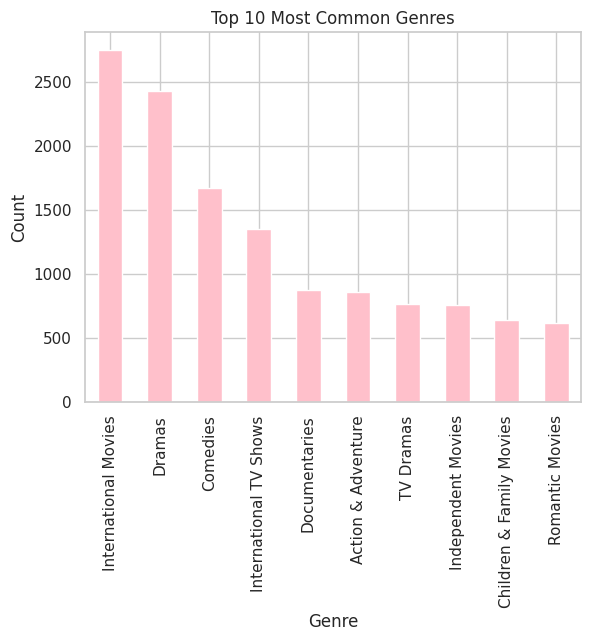

In [0]:
# Top 10 Countries with Most Content
top_genres = genre_counts.head(10)
plt.title("Top 10 Most Common Genres")
top_genres.plot(kind='bar', color='pink')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [0]:
# content type
content_type_counts = df_cleaned['type'].value_counts()
display(content_type_counts)

Movie      6129
TV Show    2675
Name: type, dtype: int64

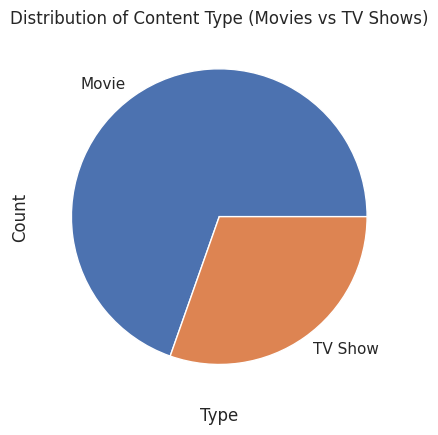

In [0]:
# Movies vs TV Shows comparision
df_cleaned['type'].value_counts().plot(kind='pie')
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [0]:
# Country counts
country_counts = df_cleaned['country'].str.split(', ', expand=True).stack().value_counts()
display(country_counts)

United States     3688
India             1045
Unknown            830
United Kingdom     804
Canada             445
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Length: 128, dtype: int64

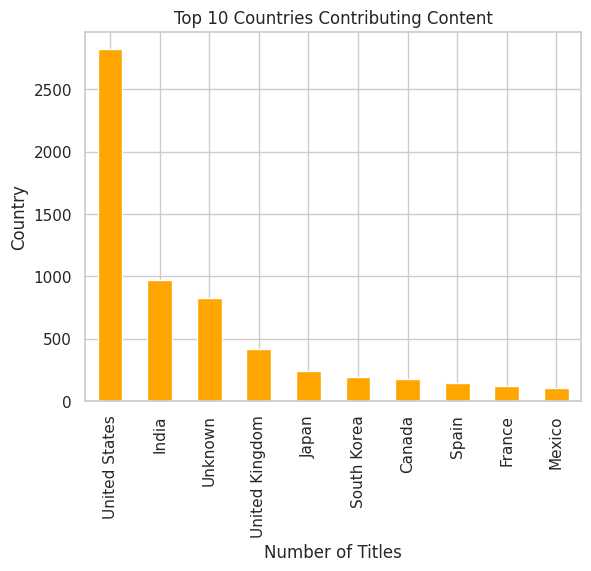

In [0]:
# Top 10 Countries with Most Content
top_countries = df_cleaned['country'].value_counts().head(10)
top_countries.plot(kind = 'bar', color = 'orange')
plt.title("Top 10 Countries Contributing Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


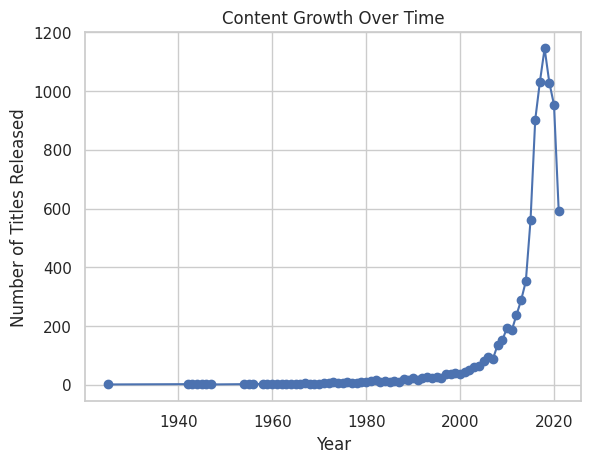

In [0]:
# Trend of Netflix content released per year
content_per_year = df_cleaned['release_year'].value_counts().sort_index()
content_per_year.plot(kind='line', marker='o')
plt.title("Content Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.show()

/home/spark-b8700019-f183-4b7a-a5ab-e2/.ipykernel/2445/command-5507716292239388-2805494851:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')


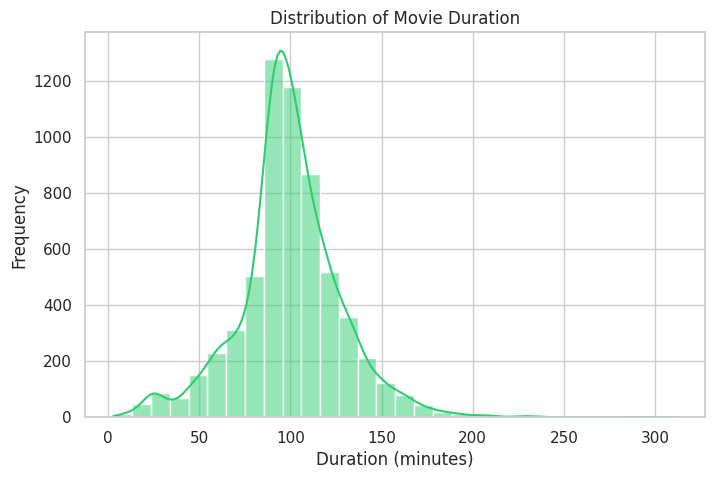

In [0]:
# Duration Analysis (Movies)
movie_df = df_cleaned[df_cleaned['type'] == 'Movie']
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

plt.figure(figsize=(8,5))
sns.histplot(movie_df['duration'], bins=30, kde=True, color="#2ecc71")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

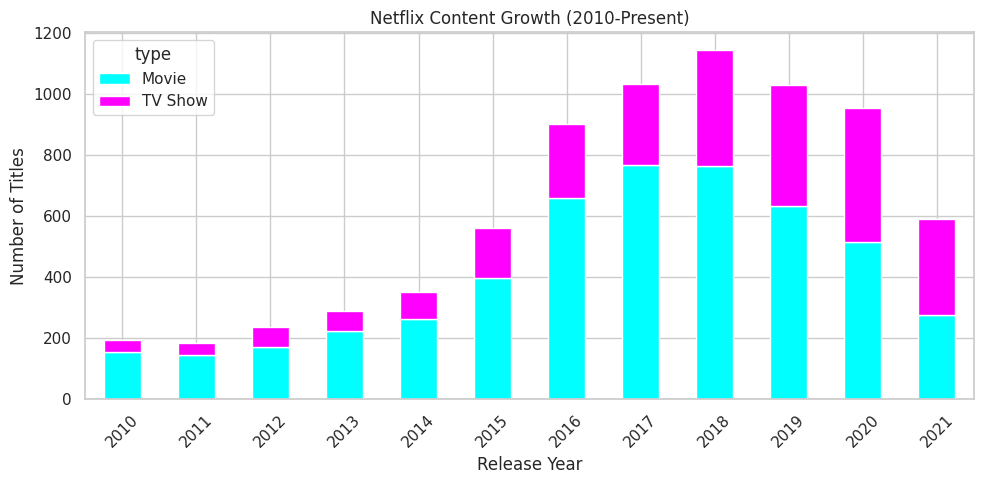

In [0]:
# Filter dataset for recent years (2010 and above), Group by year and type
recent_data = df_cleaned[df_cleaned['release_year'] >= 2010]
content_by_year_type = recent_data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_by_year_type.plot(kind='bar', stacked=True, figsize=(10,5), colormap='cool')

plt.title("Netflix Content Growth (2010-Present)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/spark-b8700019-f183-4b7a-a5ab-e2/.ipykernel/2445/command-7495848036471410-3080171539:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='rating', order=df_cleaned['rating'].value_counts().index, palette='coolwarm')


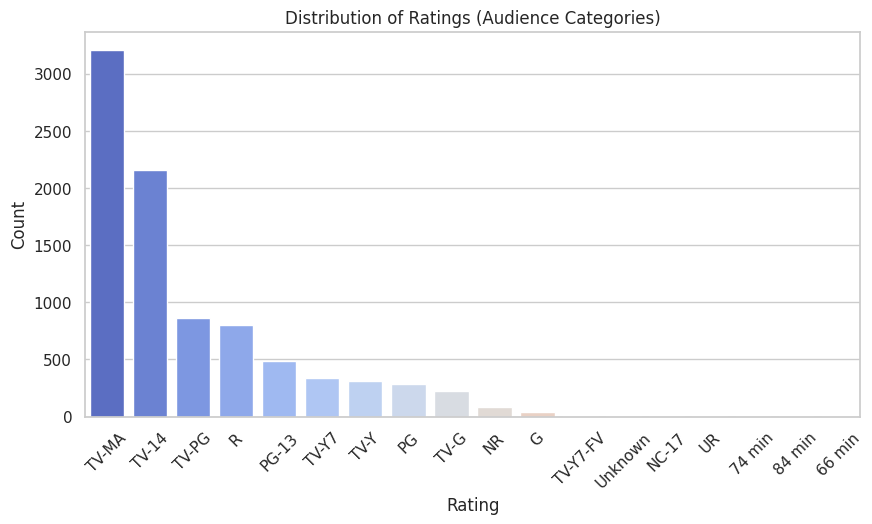

In [0]:
# Ratings Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='rating', order=df_cleaned['rating'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Ratings (Audience Categories)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

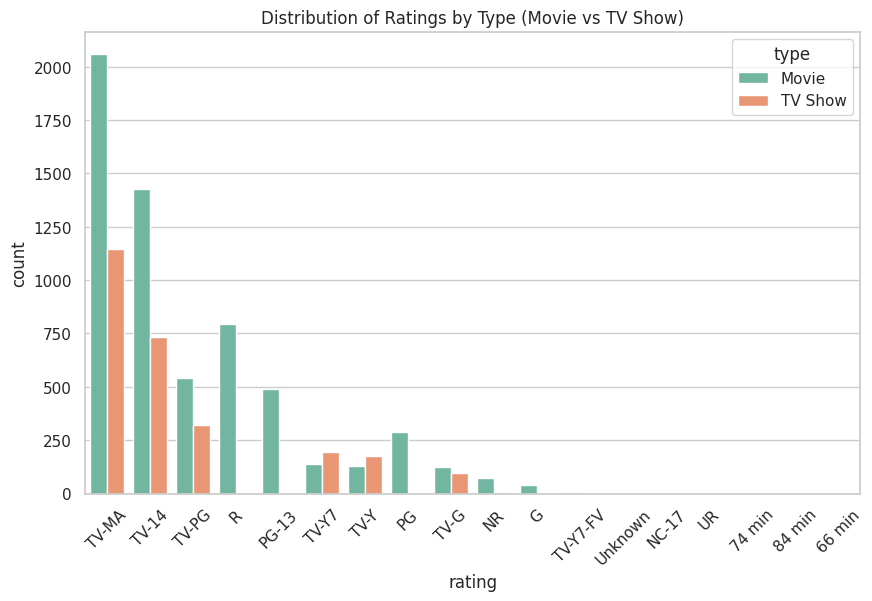

In [0]:
# Movie/TV Show vs Rating
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='rating', hue='type', palette='Set2', order=df_cleaned['rating'].value_counts().index)
plt.title("Distribution of Ratings by Type (Movie vs TV Show)")
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**

In [0]:
# Movies filtering
movie_df = df_cleaned[df_cleaned['type'] == 'Movie'].copy()
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')
def movie_duration_category(x):
    if pd.isna(x):
        return 'Unknown'
    elif x < 60:
        return 'Short'
    elif 60 <= x <= 120:
        return 'Medium'
    else:
        return 'Long'
movie_df['Content_Length_Category'] = movie_df['duration'].apply(movie_duration_category)
movie_df[['type', 'duration', 'Content_Length_Category']].head(8)

,type,duration,Content_Length_Category
0,Movie,90.0,Medium
6,Movie,91.0,Medium
7,Movie,125.0,Long
9,Movie,104.0,Medium
12,Movie,127.0,Long
13,Movie,91.0,Medium
16,Movie,67.0,Medium
18,Movie,94.0,Medium


/home/spark-cf3ff94d-fe9e-4459-a3a5-95/.ipykernel/2444/command-7284885935366219-3909545828:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movie_df, x='Content_Length_Category', palette='pastel')


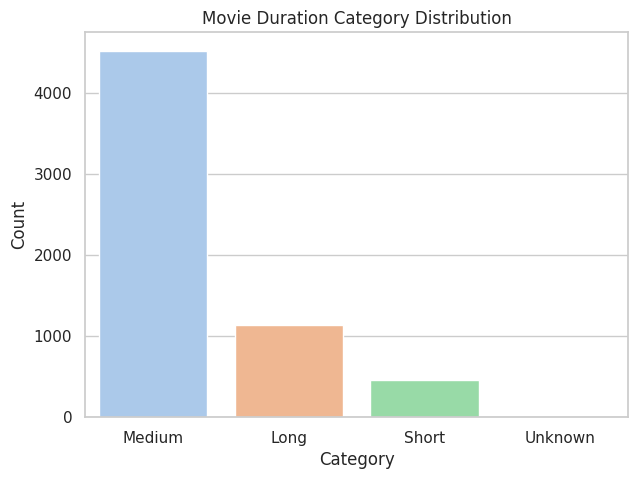

In [0]:
# Visualization
plt.figure(figsize=(7,5))
sns.countplot(data=movie_df, x='Content_Length_Category', palette='pastel')
plt.title("Movie Duration Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [0]:
# TV Shows filtering
tv_df = df_cleaned[df_cleaned['type'] == 'TV Show'].copy()
def tv_show_category(x):
    if pd.isna(x):
        return 'Unknown'
    elif x == 1:
        return 'Single Season'
    elif 2 <= x <= 4:
        return 'Mini Series'
    else:
        return 'Long Series'
tv_df['Content_Length_Category'] = tv_df['duration'].apply(tv_show_category)
tv_df[['type', 'duration', 'Content_Length_Category']].head(8)

,type,duration,Content_Length_Category
1,TV Show,2.0,Mini Series
2,TV Show,1.0,Single Season
3,TV Show,1.0,Single Season
4,TV Show,2.0,Mini Series
5,TV Show,1.0,Single Season
8,TV Show,9.0,Long Series
10,TV Show,1.0,Single Season
11,TV Show,1.0,Single Season


/home/spark-cf3ff94d-fe9e-4459-a3a5-95/.ipykernel/2444/command-7284885935366220-2324045474:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tv_df, x='Content_Length_Category', palette='cool')


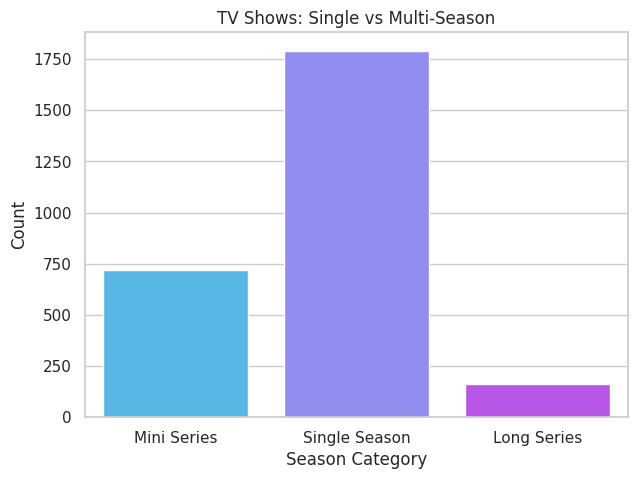

In [0]:
# Visualization
plt.figure(figsize=(7,5))
sns.countplot(data=tv_df, x='Content_Length_Category', palette='cool')
plt.title("TV Shows: Single vs Multi-Season")
plt.xlabel("Season Category")
plt.ylabel("Count")
plt.show()

In [0]:
def categorize_rating(rating):
    if rating in ['G', 'TV-Y', 'TV-G']:
        return 'Kids'
    elif rating in ['PG', 'TV-PG', 'TV-Y7', 'TV-Y7-FV']:
        return 'Family'
    elif rating in ['PG-13', 'TV-14']:
        return 'Teens'
    elif rating in ['R', 'NC-17', 'TV-MA']:
        return 'Adults'
    else:
        return 'Unknown'
df_cleaned['Age_Group_Category'] = df_cleaned['rating'].apply(categorize_rating)
df_cleaned[['rating', 'Age_Group_Category']].head(8)

,rating,Age_Group_Category
0,PG-13,Teens
1,TV-MA,Adults
2,TV-MA,Adults
3,TV-MA,Adults
4,TV-MA,Adults
5,TV-MA,Adults
6,PG,Family
7,TV-MA,Adults


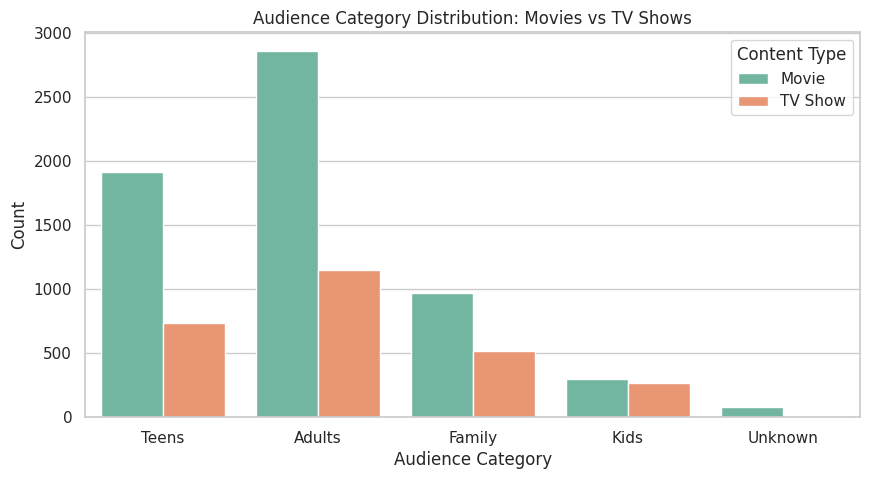

In [0]:
# Visualization
plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='Age_Group_Category', hue='type', palette='Set2')
plt.title("Audience Category Distribution: Movies vs TV Shows")
plt.xlabel("Audience Category")
plt.ylabel("Count")
plt.legend(title="Content Type")
plt.show()

In [0]:
# number of cast members
df_cleaned['cast_count'] = df_cleaned['cast'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
df_cleaned[['title', 'cast', 'cast_count']].head(8)

,title,cast,cast_count
0,Dick Johnson Is Dead,Unknown,1
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",19
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",9
3,Jailbirds New Orleans,Unknown,1
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",8
5,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",16
6,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",10
7,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",8


/home/spark-cf3ff94d-fe9e-4459-a3a5-95/.ipykernel/2444/command-7284885935366218-2677211861:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_casts, x='cast_count', y='title', palette='viridis')


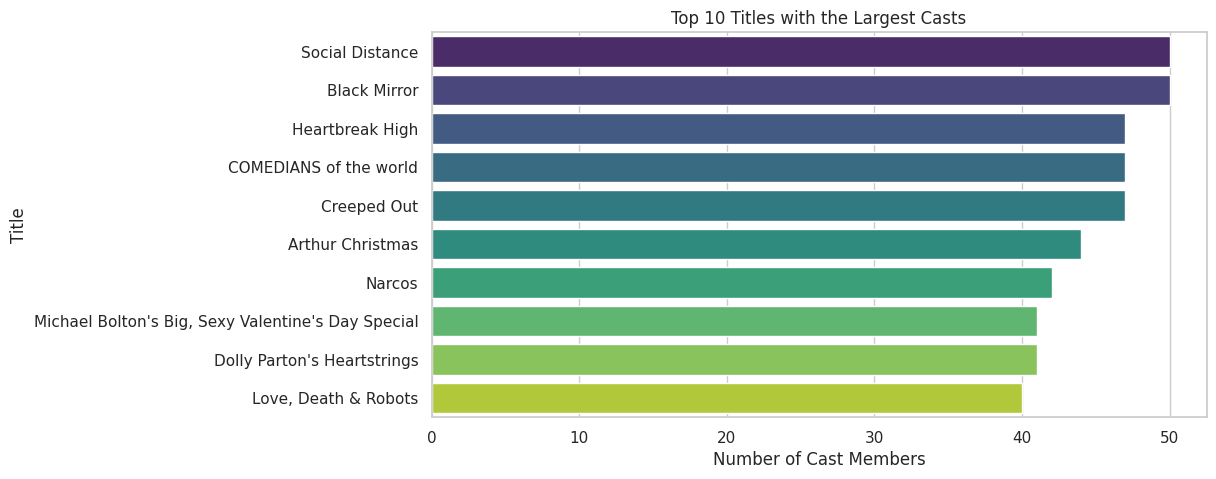

In [0]:
# Visualization of Top 10 Titles with the Largest Casts
top_casts = df_cleaned[['title', 'cast_count']].sort_values(by='cast_count', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_casts, x='cast_count', y='title', palette='viridis')
plt.title("Top 10 Titles with the Largest Casts")
plt.xlabel("Number of Cast Members")
plt.ylabel("Title")
plt.show()

In [0]:
# Netflix Originals vs Licensed content
origin = []
for desc in df_cleaned['description']:
    if isinstance(desc, str) and ('netflix' in desc.lower() or 'original' in desc.lower()):
        origin.append('Netflix Original')
    else:
        origin.append('Licensed')
df_cleaned['content_origin'] = origin
df_cleaned[['title', 'content_origin']].head(8)

,title,content_origin
0,Dick Johnson Is Dead,Licensed
1,Blood & Water,Licensed
2,Ganglands,Licensed
3,Jailbirds New Orleans,Licensed
4,Kota Factory,Licensed
5,Midnight Mass,Licensed
6,My Little Pony: A New Generation,Licensed
7,Sankofa,Licensed


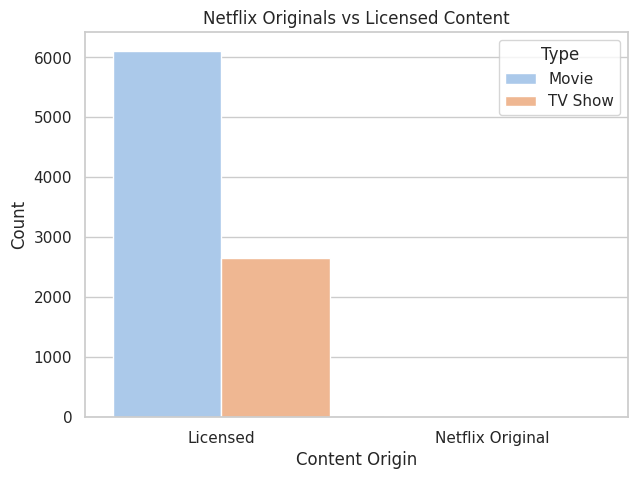

In [0]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_cleaned, x='content_origin', hue='type', palette='pastel')
plt.title("Netflix Originals vs Licensed Content")
plt.xlabel("Content Origin")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()